<div  align="center" style="font-family: Arial; font-size:1.8em;color:green;"> ***  Compte rendu TP N°2  ***</div >
<div align="center" style="font-family: Arial; font-size:1.8em;color:gold;"> Segmentation  </div>


<p style="font-family: Arial; font-size:1.8em;color:gold;">  Bedhief  Safwa </p>


<p style="font-family: Arial; font-size:1.8em;color:silver;"> 3DNI 1 </p>


<!-- -->


<!-- -->


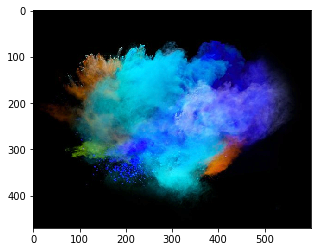

In [9]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt

image = cv2.imread('colors.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 8)
 
labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('color8.jpg', quant)
plt.imshow(image)

cv2.imread('colors.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

<p style="font-family: Arial; font-size:50xp;">  pour  k=2,3,4et 8   
 </p>


<p style="font-family: Arial; font-size:50xp;color:magenta;"> --> Remarque :  plus K augmente plus image proche de l'image origine   
 </p>


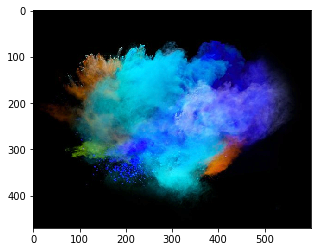

In [10]:
plt.imshow(image)

In [2]:
!pip install opencv-python

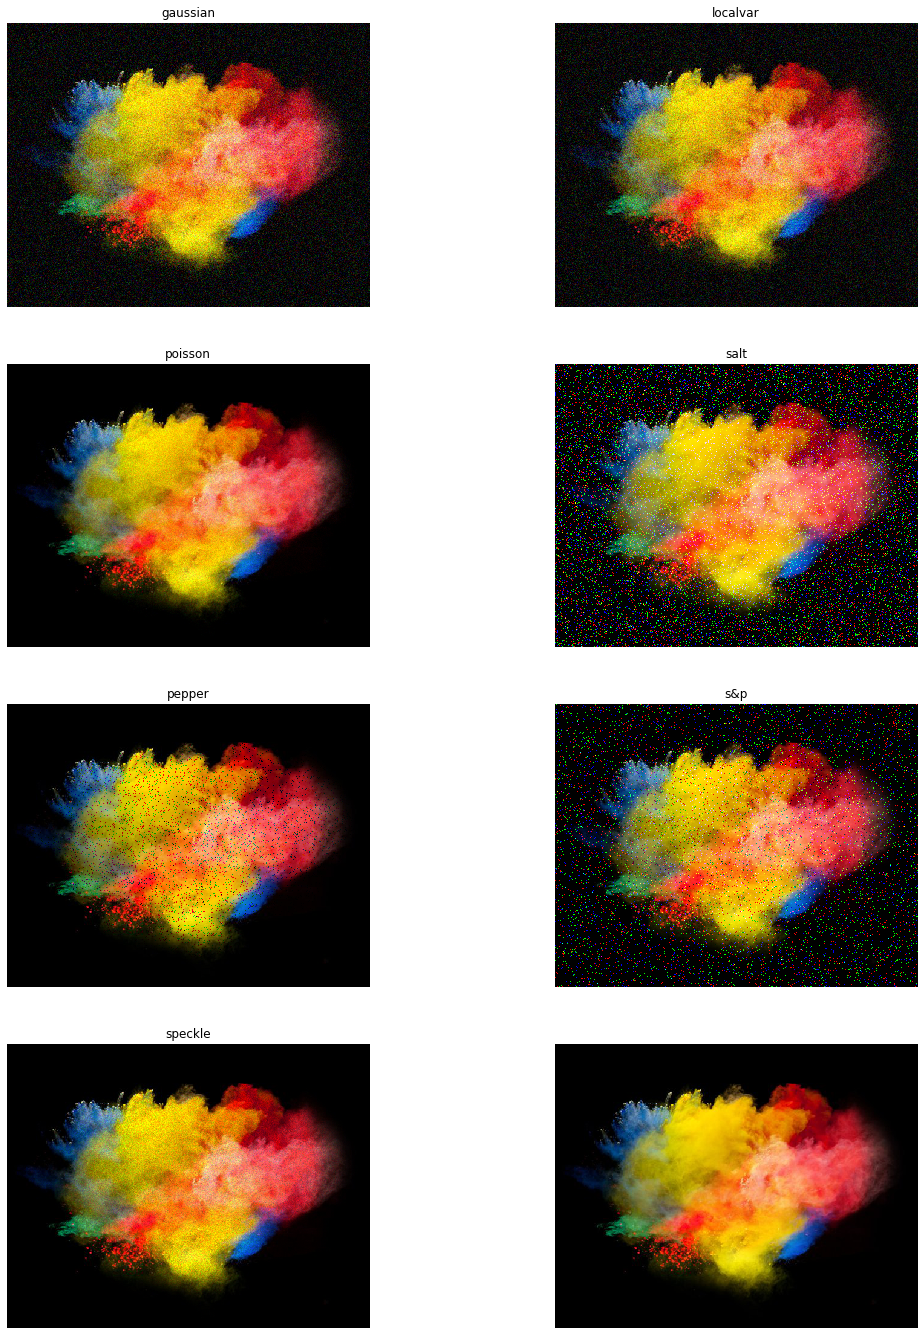

In [19]:
import skimage.io
import matplotlib.pyplot as plt
import cv2

img_path="colors.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
        img_noised=gimg

        cv2.imwrite('imagenoised.jpg', img_noised)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()



<p style="font-family: Arial; font-size:1.8em;color:magenta;">-->  on a appliquer les differents filters au image origine 
</p>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


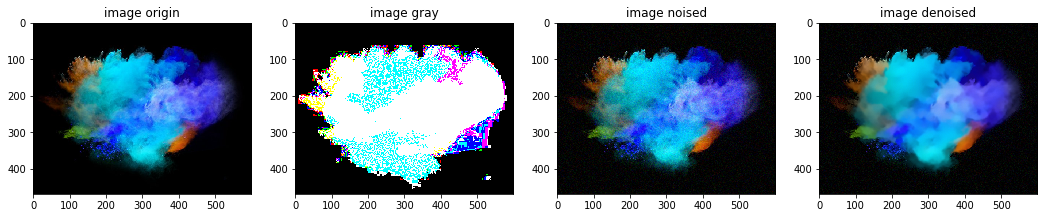

In [44]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

imag = cv2.imread('colors.jpg')
# convert  to grayscale
gray = cv2.cvtColor(imag, cv2.COLOR_BGR2GRAY) 

# convert  to float64
gray = np.float64(imag) 

# create a noise of variance 25
noise = np.random.randn(*gray.shape)*10

# Add this noise to images
noisy = gray+noise 

# Convert back to uint8
noisy = np.uint8(np.clip(noisy,0,255)) 

# Denoise  
dst = cv2.fastNlMeansDenoisingColored(noisy,None,10,10,7,21)

cv2.imwrite('denoisedimage.jpg', dst)
cv2.imwrite('noiseimage.jpg', noisy)

plt.figure(figsize=(18,24))
plt.subplot(141),plt.imshow(imag)
plt.gca().set_title('image origin')

plt.subplot(142),plt.imshow(gray)
plt.gca().set_title('image gray')

plt.subplot(143),plt.imshow(noisy)
plt.gca().set_title('image noised')

plt.subplot(144),plt.imshow(dst)
plt.gca().set_title('image denoised')

plt.show()

<p style="font-family: Arial; font-size:1.8em;color:magenta;"> -->  le résultat, la première image est le cadre d’origine, la seconde est le bruit, la troisième est l’image dénouée.
</p>
<p> lorsque on compare l'image origine à l'image dénouée c'est presque la meme  </p>


